In [ ]:
pip install ucimlrepo

In [ ]:
# importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)


# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

"""
From the repository

The "num" field refers to the presence of heart disease in the patient.
It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland
database have concentrated on simply attempting to distinguish
presence (values 1,2,3,4) from absence (value 0).
"""

print("Y \n", y.head())

# making y binary where 0 means absence and 1 means presence
y_processed = pd.DataFrame(np.where(y == 0, 0, 1), columns=['num'])
print("Processed Y",y_processed.head())

Y 
    num
0    0
1    2
2    1
3    0
4    0
Processed Y    num
0    0
1    1
2    1
3    0
4    0


In [ ]:
df = pd.concat([X, y_processed], axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [ ]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [ ]:
# splitting into train and test sets to avoid Data Leakage
X = df.drop('num', axis=1)
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

1.   **General Information**

*   How many rows and columns are in the dataset?
*   Are there any missing values in the dataset?



In [ ]:
df.shape

(303, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


There 303 records in the dataset and 13 features making shape of the dataset (303,13).

Missing values in ca = 4

Missing values in thal = 2




2.**Target Variable Analysis**
*   What is the distribution of the target variable (presence of heart disease: 0 or 1)?
*   How many patients have heart disease, and how many don’t?






In [ ]:
target_counts = df['num'].value_counts()
print(f"Distribution of the target variable:\n{target_counts}\nNumber of patients with heart disease:{target_counts[1]}\nNumber of patients without heart disease: {target_counts[0]}")

Distribution of the target variable:
num
0    164
1    139
Name: count, dtype: int64
Number of patients with heart disease:139
Number of patients without heart disease: 164


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


No categorical features. However, some features although are numbers but have categorical nature. These features include sex, fbs, restecg, thal, slope, cp, exang and target

In [ ]:
numeric_feat = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_feat = ['sex', 'restecg', 'thal', 'slope', 'cp', 'exang', 'ca','fbs']

Univariant Analysis
Categorical features

categorical_feat = ['sex', 'restecg', 'thal', 'slope', 'cp', 'exang', 'num','ca']




3.   **Demographic Insights**

* What is the age range of patients in the dataset?
* What is the gender distribution of the patients?

In [ ]:
print(f"Age range of patients: {df['age'].min()} - {df['age'].max()}")

Age range of patients: 29 - 77


In [ ]:
gender_counts = df['sex'].value_counts()
print(f"Gender distribution (0 = Female, 1 = Male):\n {gender_counts}")

Gender distribution (0 = Female, 1 = Male):
 sex
1    206
0     97
Name: count, dtype: int64




4. **Health Metrics**

What are the average and median values of:

*   Resting blood pressure (trestbps)?
*   Serum cholesterol (chol)?
*   Maximum heart rate (thalach)?

In [ ]:
feat = ['trestbps','chol','thalach']
for i in range(0,3):
  print(f"Average of {feat[i]}: {df[feat[i]].mean()}\t\tMedian of {feat[i]}: {df[feat[i]].median()}")

Average of trestbps: 131.68976897689768		Median of trestbps: 130.0
Average of chol: 246.69306930693068		Median of chol: 241.0
Average of thalach: 149.6072607260726		Median of thalach: 153.0




5.   **Categorical Features**

*   How many patients have exercise-induced angina (exang)?
*   What are the counts of different chest pain types (cp)?


In [ ]:
print(f"Number of patients with exercise-induced angina (exang): {df['exang'].value_counts()}")
print(f"Counts of different chest pain types (cp): {df['cp'].value_counts()}")

Number of patients with exercise-induced angina (exang): exang
0    204
1     99
Name: count, dtype: int64
Counts of different chest pain types (cp): cp
4    144
3     86
2     50
1     23
Name: count, dtype: int64


In [ ]:
def plot_count(dataframe:pd.DataFrame,feat:str,x_label:str,x_ticks:list[str]=None):
  if x_ticks:
    ax = sns.countplot(x=feat, data=dataframe,palette='colorblind')
    ax.set_xticklabels(x_ticks)
  else:
    ax = sns.countplot(x=feat, data=dataframe,palette='colorblind')

  ax.set_xlabel(x_label)
  return ax

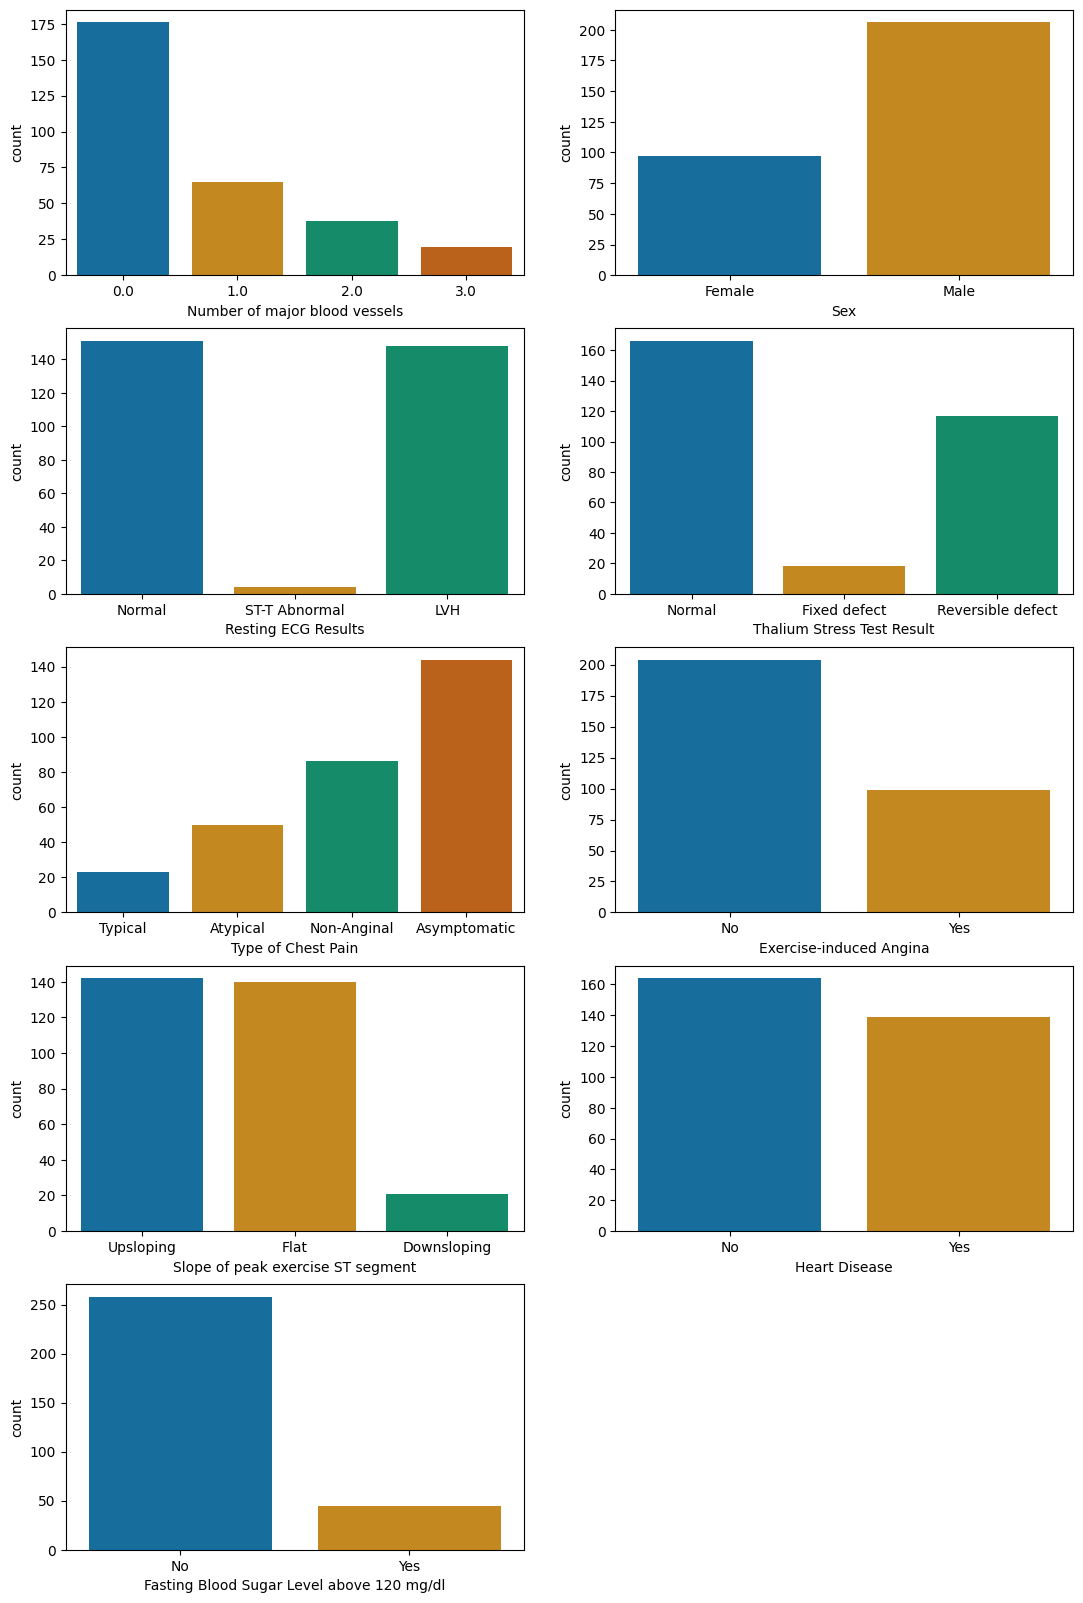

In [ ]:
plt.figure(figsize=(13,20))
plt.subplot(5,2,1)
plot_count(df,feat='ca',x_label='Number of major blood vessels')
plt.subplot(5,2,2)
plot_count(df,feat='sex',x_label='Sex', x_ticks=['Female', 'Male'])
plt.subplot(5,2,3)
plot_count(df,feat='restecg',x_label="Resting ECG Results", x_ticks=['Normal', 'ST-T Abnormal','LVH'])
plt.subplot(5,2,4)
plot_count(df,feat='thal',x_label="Thalium Stress Test Result", x_ticks=['Normal','Fixed defect','Reversible defect'])
plt.subplot(5,2,5)
plot_count(df,feat='cp',x_label="Type of Chest Pain", x_ticks=['Typical', 'Atypical','Non-Anginal','Asymptomatic'])
plt.subplot(5,2,6)
plot_count(df,feat='exang',x_label="Exercise-induced Angina", x_ticks=['No', 'Yes'])
plt.subplot(5,2,7)
plot_count(df,feat='slope',x_label="Slope of peak exercise ST segment", x_ticks=['Upsloping','Flat','Downsloping'])
plt.subplot(5,2,8)
plot_count(df,feat='num',x_label="Heart Disease", x_ticks=['No', 'Yes'])
plt.subplot(5,2,9)
plot_count(df,feat='fbs',x_label="Fasting Blood Sugar Level above 120 mg/dl", x_ticks=['No', 'Yes'])

plt.show()



6.   **Visual Analysis**

*   Plot the age distribution of the patients.
*   Compare the average cholesterol levels between patients with and without heart disease.

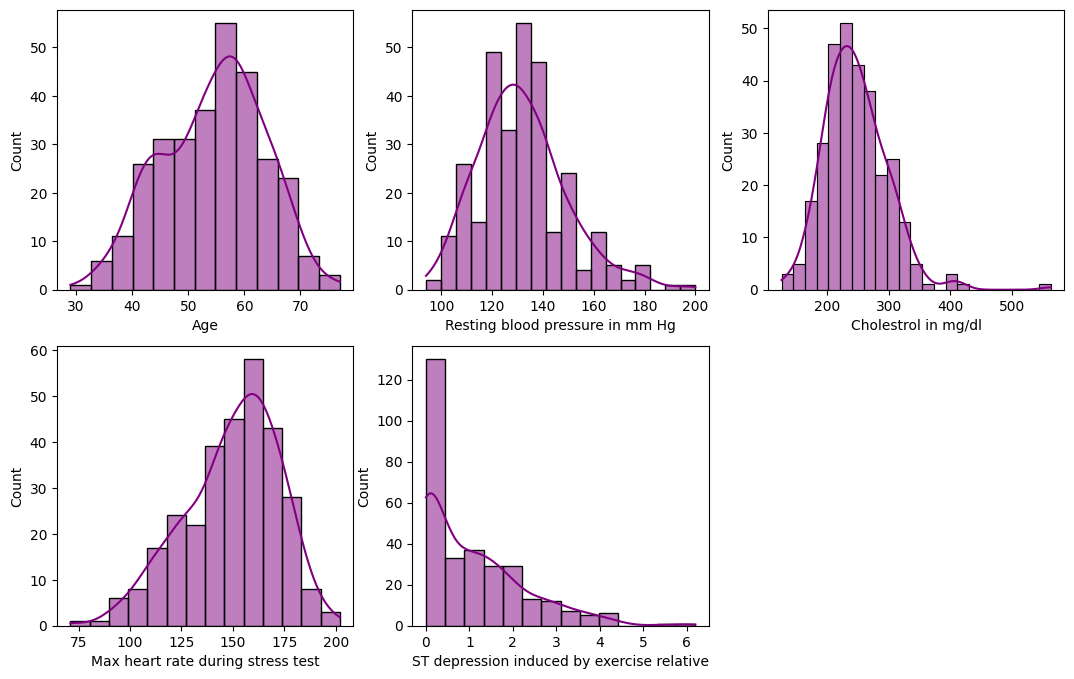

In [ ]:
def plot_histogram(dataframe:pd.DataFrame,feat:str,x_label:str):
  ax = sns.histplot(x=feat, kde=True, data=dataframe,color="purple")
  ax.set_xlabel(x_label)
  return ax

plt.figure(figsize=(13,8))
plt.subplot(2,3,1)
plot_histogram(df,"age","Age")
plt.subplot(2,3,2)
plot_histogram(df,"trestbps","Resting blood pressure in mm Hg")
plt.subplot(2,3,3)
plot_histogram(df,"chol","Cholestrol in mg/dl")
plt.subplot(2,3,4)
plot_histogram(df,"thalach","Max heart rate during stress test")
plt.subplot(2,3,5)
plot_histogram(df,"oldpeak","ST depression induced by exercise relative")

plt.show()

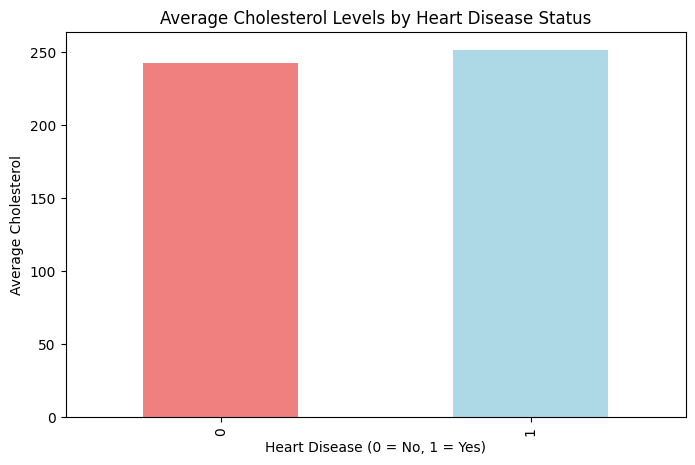

In [ ]:
cholesterol_avg = df.groupby('num')['chol'].mean()
plt.figure(figsize=(8, 5))
cholesterol_avg.plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title('Average Cholesterol Levels by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Average Cholesterol')
plt.show()



1.   **Outliers**

*   Are there any outliers in cholesterol (chol) or resting blood pressure (trestbps)?


In [ ]:
def plot_boxplot(ax:plt.axis, dataframe:pd.DataFrame,feat:str,x_label:str):
  ax = sns.boxplot(y=feat, x='num', data=dataframe,ax=ax,palette="Set2")
  ax.set_ylabel(x_label)
  ax.set_xlabel('Heart Disease')
  ax.set_title(f'Box Plot of Target by {x_label}')
  return ax

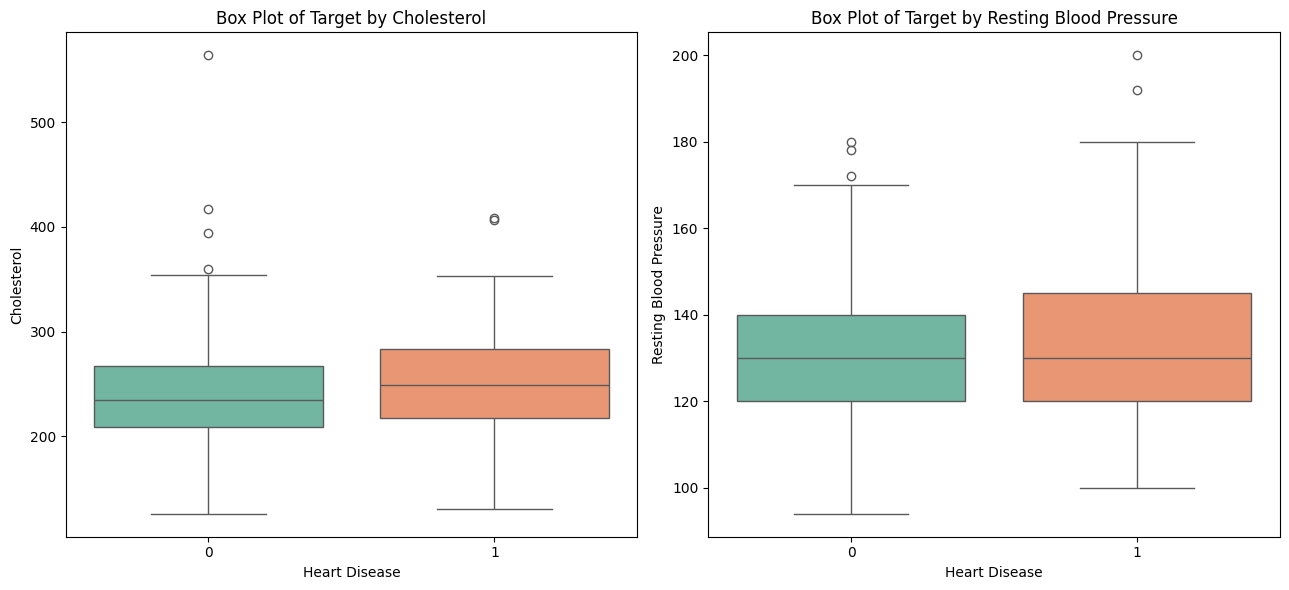

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13, 6))

# Boxplot for cholesterol
plot_boxplot(axes[0], df, 'chol', 'Cholesterol')

# Boxplot for resting blood pressure
plot_boxplot(axes[1], df, 'trestbps', 'Resting Blood Pressure')
plt.tight_layout()
plt.show()


Several outliers present in the dataset which needs to be handled